In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score 

In [88]:
#load the data
df = pd.read_csv(r"D:\Internship Elevate labs\Project 2\Airbnb_India_Top_500.csv")

In [89]:
df.head(10)

,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN
2,"Goa, India",False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75
5,"Bhuntar, Himachal Pradesh, India",False,32.01248,77.29114,Aman Palace Guest House Kasol With Super Delux...,3,4274,Room in hotel,NaN
6,"Bhuntar, Himachal Pradesh, India",False,32.01204,77.29090,Aman Palace Guest House Kasol With Deluxe Room,2,4274,Room in hotel,NaN
7,"Gurugram, Haryana, India",True,28.36673,77.00647,Boutique destination wedding experience 50pax...,16,1734,Farm stay,NaN
8,"Ganaheda, Rajasthan, India",False,26.49372,74.53830,Lux farm resort with pool - Villa,12,1804,Farm stay,NaN
9,"Banjar, Himachal Pradesh, India",False,31.63839,77.34503,Deluxe Room,3,2822,Room in hotel,NaN


In [90]:
# Extract city
df['city'] = df['address'].apply(lambda x: x.split(',')[0].strip())

In [91]:
#fill missing stars
df['stars_filled']=df['stars'].fillna(df['stars'].median())

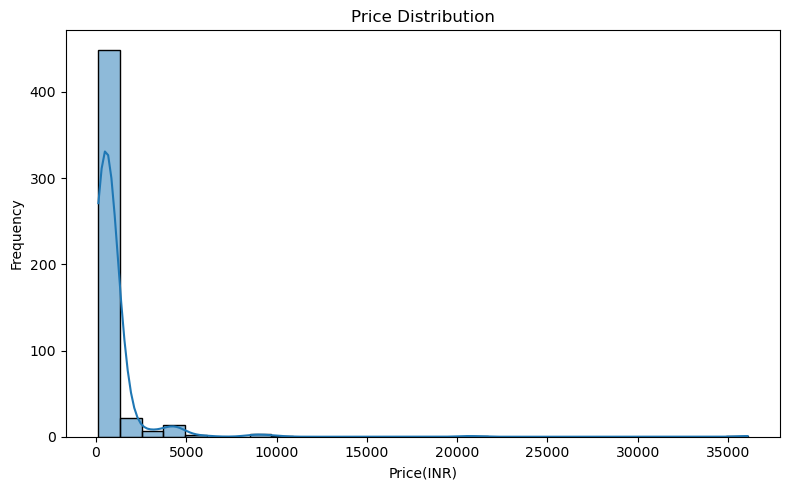

In [92]:
#plot: price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['pricing/rate/amount'], bins=30, kde=True) 
plt.title('Price Distribution')
plt.xlabel('Price(INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

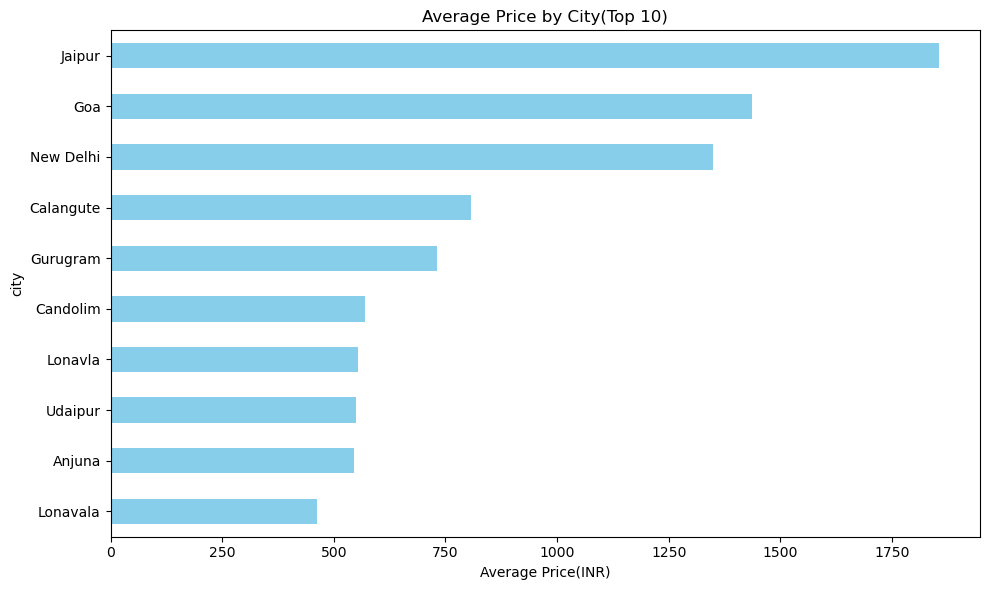

In [93]:

#plot avarage price by city
top_cities =df['city'].value_counts().head(10).index
avg_price_city =df[df['city'].isin(top_cities)].groupby('city')['pricing/rate/amount'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_price_city.plot(kind='barh',color='skyblue')
plt.title('Average Price by City(Top 10)')
plt.xlabel('Average Price(INR)')
plt.tight_layout()
plt.show()

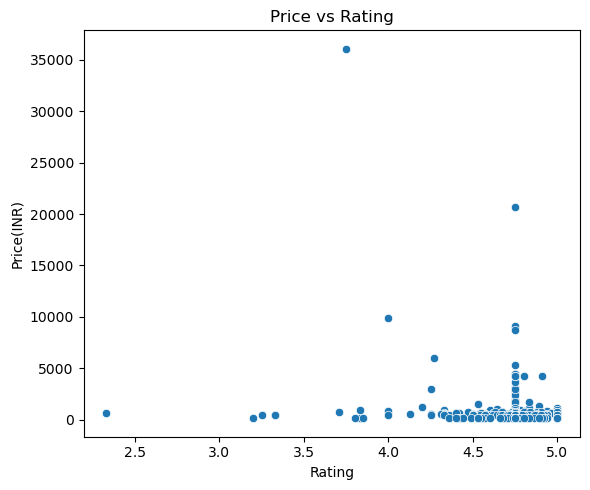

In [94]:
#Correlation: Price vs Rating
plt.figure(figsize=(6,5))
sns.scatterplot(x='stars_filled', y='pricing/rate/amount', data=df)
plt.title('Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price(INR)')
plt.tight_layout()
plt.show()

In [95]:
#select features and target 
x =df[['city','roomType','numberOfGuests','stars_filled','isHostedBySuperhost' ]]
y =df['pricing/rate/amount']


In [96]:
#define categorical and numerical columns
categorical_cols = ['city','roomType',]
numerical_cols = ['numberOfGuests','stars_filled',]
boolean_cols = ['isHostedBySuperhost']

In [97]:
#create column transformer
preprocessor = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('bool', 'passthrough', boolean_cols),
    ('num', 'passthrough', numerical_cols)
])
 

In [98]:
#ceate pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [99]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
#fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city', 'roomType']),
                                                 ('bool', 'passthrough',
                                                  ['isHostedBySuperhost']),
                                                 ('num', 'passthrough',
                                                  ['numberOfGuests',
                                                   'stars_filled'])])),
                ('regressor', LinearRegression())])

In [101]:
#predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [102]:
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 693.5991707322
R^2 Score: 0.07505587511415124


In [110]:
import pandas as pd
def predict_price(city, room_type, guests, rating, is_superhost, model):
   
   # prepare the  input as a single_row Dataframe
    input_data = pd.DataFrame([{
        'city': city,
        'roomType': room_type,
        'numberOfGuests': guests,
        'stars_filled': rating,
        'isHostedBySuperhost': is_superhost
    }])
    #predict the price using the model
    predicted_price = model.predict(input_data)
    #reture the first value of the predicted array
    return (predicted_price[0],2)


In [114]:
print(predict_price('Bengluru', 'Entire home/apt', 4, 4.8, True, model)) 


(5.163445081486316, 2)
